In [2]:
import numpy as np
import astropy.io.ascii as at
import matplotlib.pyplot as plt
%matplotlib inline
from astroML import time_series

import hypra.prot.fix_kepler
import hypra.prot.time_series

from k2spin import lc
from k2spin import k2io
from k2spin import plot

Now I have corrected lightcurves, no need to constantly re-run this

In [3]:
filename = "output_lcs/ktwo210359769-c04_lcs.csv"
lcs = at.read(filename)

t = lcs["t"]
y = lcs["corr"]
dy = np.ones_like(y)


Test the Edelson-Krolik modified ACF on the raw lightcurve

In [4]:
C_EK, C_EK_err, bins = time_series.ACF_EK(t, y, y,
                                          bins=np.linspace(0,70,400)
                                          )
t_EK = 0.5 * (bins[1:] + bins[:-1])

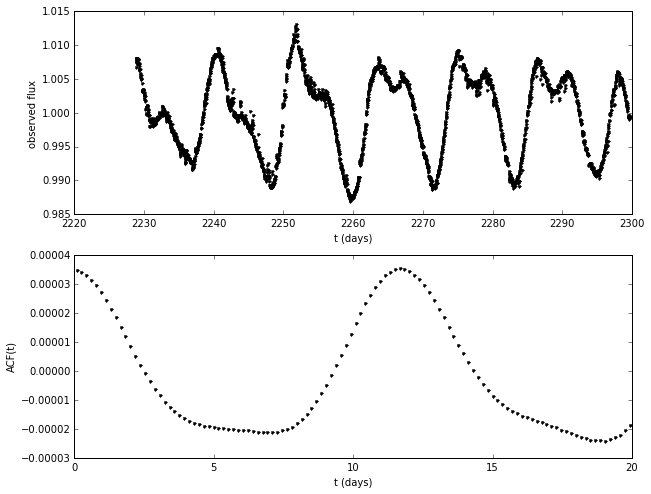

In [5]:
# Plot the results
fig = plt.figure(figsize=(10, 8))

# plot the input data
ax = fig.add_subplot(211)
#ax.errorbar(t, y, dy, fmt='.k', lw=1)
ax.plot(t, y,'k.', lw=1)
ax.set_xlabel('t (days)')
ax.set_ylabel('observed flux')

# plot the ACF
ax = fig.add_subplot(212)
#ax.errorbar(t_EK, C_EK, C_EK_err, fmt='.k', lw=1)
ax.plot(t_EK, C_EK, 'k.', lw=1)
ax.set_xlim(0, 20)
#ax.set_ylim(-0.003, 0.003)

ax.set_xlabel('t (days)')
ax.set_ylabel('ACF(t)')


That _looks_ nice, but that's a teeny tiny value for the ACF and I have no idea what the errors look like this time

Now try it with the flux that's been position-corrected

What about filling the gaps?

In [6]:
cadence = np.median(np.diff(t))
print cadence

0.0204319999998


11.666671999886148

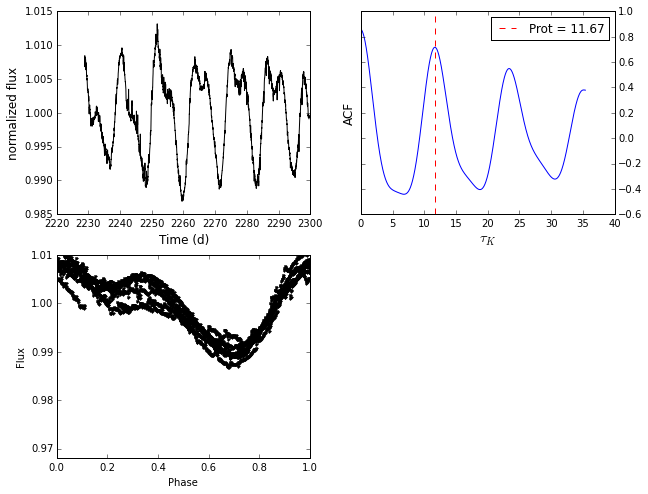

In [8]:
t2, y2, dy2 = hypra.prot.fix_kepler.fill_gaps(t,y,dy)
hypra.prot.time_series.run_acf(t2, y2, plot=True)

So it looks nice when applied to the corrected lc....

Let's try the raw lightcurve

11.666671999886148

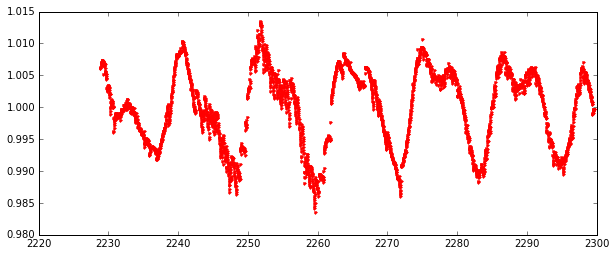

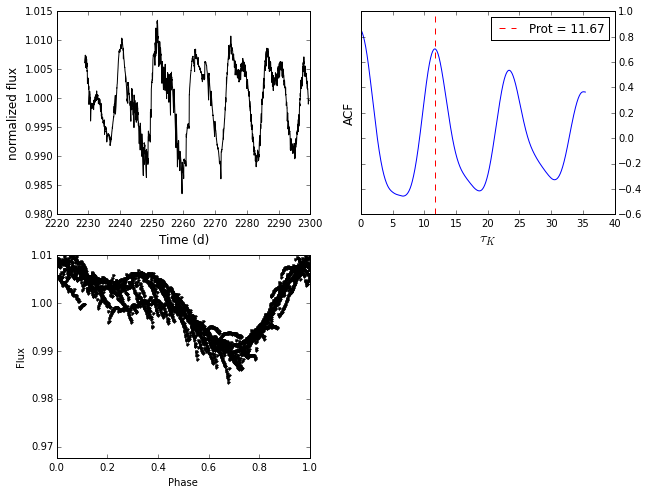

In [9]:
t3, y3, dy3 = hypra.prot.fix_kepler.fill_gaps(t, lcs["det"], dy)
plt.figure(figsize=(10,4))
plt.plot(t3,y3,'r.')
hypra.prot.time_series.run_acf(t3, y3, plot=True)